# Convolutional Neural Networks: Application



## Table of Contents

- [1 - Packages](#1)
    - [1.1 - Load the Data and Split the Data into Train/Test Sets](#1-1)
- [2 - The Sequential API](#3)
    - [2.1 - Create the Sequential Model](#3-1)
    - [2.2 - Train and Evaluate the Model](#3-2)
- [3 - The Functional API](#4)
    - [3.1 - Load the SIGNS Dataset](#4-1)
    - [3.2 - Split the Data into Train/Test Sets](#4-2)
    - [3.3 - Forward Propagation](#4-3)
    - [3.4 - Train the Model](#4-4)
- [4 - History Object](#5)

<a name='1'></a>
## 1 - Packages

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

This project used the Happy House dataset, which contains images of peoples' faces, to train a ConvNet that determines whether the people in the images are smiling or not

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


<a name='3'></a>
## 2 - The Sequential API

<a name='2-1'></a>
### 2.1 - Create the Sequential Model


In [ ]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(input_shape=(64, 64, 3), padding=3),
            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(filters=32, kernel_size=7, strides=1),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis=3),
            ## ReLU
            tf.keras.layers.ReLU(),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPool2D(),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(units=1, activation='sigmoid'),
            # tf.keras.layers.Activation(tf.nn.sigmoid)
        ])

    return model

In [ ]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
happy_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_15 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_14 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

<a name='2-2'></a>
### 2.2 - Train and Evaluate the Model



In [ ]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 95ms/step - loss: 1.0705 - accuracy: 0.6950
Epoch 2/10
38/38 [==============================] - 4s 95ms/step - loss: 0.2717 - accuracy: 0.8767
Epoch 3/10
38/38 [==============================] - 4s 95ms/step - loss: 0.2072 - accuracy: 0.9250
Epoch 4/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1170 - accuracy: 0.9633
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0716 - accuracy: 0.9767
Epoch 6/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0656 - accuracy: 0.9783
Epoch 7/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0667 - accuracy: 0.9783
Epoch 8/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0935 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0881 - accuracy: 0.9667
Epoch 10/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0634 - accuracy: 0.9750


In [ ]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 33ms/step - loss: 0.1145 - accuracy: 0.9600


[0.11447519809007645, 0.9599999785423279]

<a name='3'></a>
## 3 - The Functional API

The Functional API, unlike the Sequential API, can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Sequential is a straight line, while a Functional model is a graph, where the nodes of the layers can connect in many more ways than one.


<a name='3-1'></a>
### 3.1 - Load the SIGNS Dataset

The SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


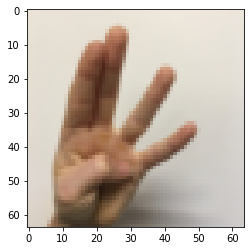

In [ ]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='3-2'></a>
### 3.2 - Split the Data into Train/Test Sets


In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='3-3'></a>
### 3.3 - Forward Propagation

In TensorFlow, there are built-in functions that implement the convolution steps. In the [Functional API](https://www.tensorflow.org/guide/keras/functional), we can create a graph of layers. This is what allows such great flexibility.

I began building the graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):**

Then, I created a new node in the graph of layers by calling a layer on the `input_img` object:

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read the full documentation on [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples the input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, we usually operate on a single example at a time and a single channel at a time. Read the full documentation on [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). The full documentation is here [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.  

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.
    
    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  The full documentation is here [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. The full documentation is here [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

Lastly, before creating the model, I defined the output using the last of the function's compositions (in this example, a Dense layer):

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**



In [ ]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=4, strides=1, padding='same')(input_img)
    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), strides=1, padding='same')(P1)
    ## RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=4, padding='same')(A2)
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)

Model: "functional_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 16)         

<a name='3-4'></a>
### 3.4 - Train the Model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 112ms/step - loss: 1.8320 - accuracy: 0.1620 - val_loss: 1.7976 - val_accuracy: 0.1000
Epoch 2/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7969 - accuracy: 0.1278 - val_loss: 1.7923 - val_accuracy: 0.2083
Epoch 3/100
17/17 [==============================] - 2s 112ms/step - loss: 1.7927 - accuracy: 0.1935 - val_loss: 1.7907 - val_accuracy: 0.2333
Epoch 4/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7907 - accuracy: 0.2120 - val_loss: 1.7900 - val_accuracy: 0.2667
Epoch 5/100
17/17 [==============================] - 2s 112ms/step - loss: 1.7891 - accuracy: 0.2185 - val_loss: 1.7884 - val_accuracy: 0.2750
Epoch 6/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7876 - accuracy: 0.2333 - val_loss: 1.7869 - val_accuracy: 0.3250
Epoch 7/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7860 - accuracy: 0.2370 - val_loss: 1.7857 - val_accuracy: 0.2417

Epoch 58/100
17/17 [==============================] - 2s 107ms/step - loss: 0.6658 - accuracy: 0.7852 - val_loss: 0.7579 - val_accuracy: 0.7000
Epoch 59/100
17/17 [==============================] - 2s 106ms/step - loss: 0.6576 - accuracy: 0.7935 - val_loss: 0.7502 - val_accuracy: 0.7167
Epoch 60/100
17/17 [==============================] - 2s 107ms/step - loss: 0.6487 - accuracy: 0.7926 - val_loss: 0.7443 - val_accuracy: 0.7250
Epoch 61/100
17/17 [==============================] - 2s 107ms/step - loss: 0.6413 - accuracy: 0.7935 - val_loss: 0.7371 - val_accuracy: 0.7333
Epoch 62/100
17/17 [==============================] - 2s 106ms/step - loss: 0.6330 - accuracy: 0.8000 - val_loss: 0.7297 - val_accuracy: 0.7250
Epoch 63/100
17/17 [==============================] - 2s 107ms/step - loss: 0.6256 - accuracy: 0.8056 - val_loss: 0.7223 - val_accuracy: 0.7500
Epoch 64/100
17/17 [==============================] - 2s 106ms/step - loss: 0.6172 - accuracy: 0.8046 - val_loss: 0.7167 - val_accuracy:

<a name='4'></a>
## 4 - History Object

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that can be retrieved at `history.history`:

In [ ]:
history.history

{'loss': [1.832021951675415,
  1.7968534231185913,
  1.7927029132843018,
  1.7907171249389648,
  1.7891197204589844,
  1.7875511646270752,
  1.7859898805618286,
  1.7841594219207764,
  1.7818211317062378,
  1.77769935131073,
  1.7732744216918945,
  1.7666789293289185,
  1.7579294443130493,
  1.7469185590744019,
  1.731240153312683,
  1.7095445394515991,
  1.6824156045913696,
  1.6517289876937866,
  1.6151138544082642,
  1.5705281496047974,
  1.5270885229110718,
  1.4817931652069092,
  1.4382315874099731,
  1.3936662673950195,
  1.3542733192443848,
  1.3126587867736816,
  1.2718405723571777,
  1.2333070039749146,
  1.1986982822418213,
  1.1639196872711182,
  1.1308989524841309,
  1.1000391244888306,
  1.071606159210205,
  1.0440125465393066,
  1.0173523426055908,
  0.9913626313209534,
  0.9680266380310059,
  0.9461867213249207,
  0.9243859052658081,
  0.901781439781189,
  0.8826159834861755,
  0.864599883556366,
  0.8472504019737244,
  0.8300906419754028,
  0.8144285082817078,
  0.79919

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

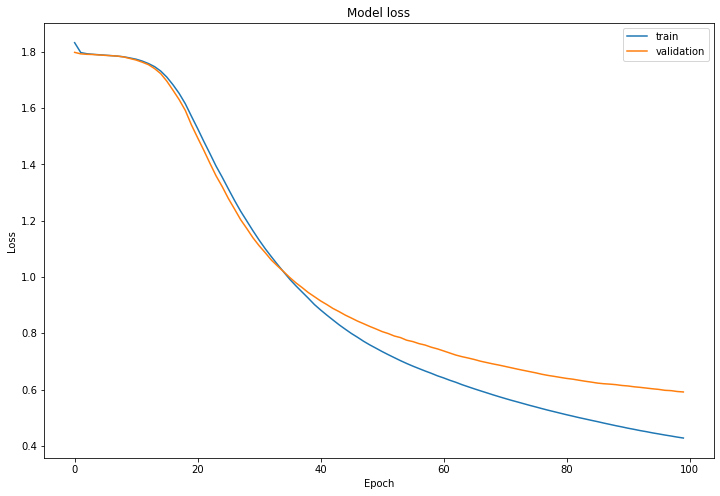

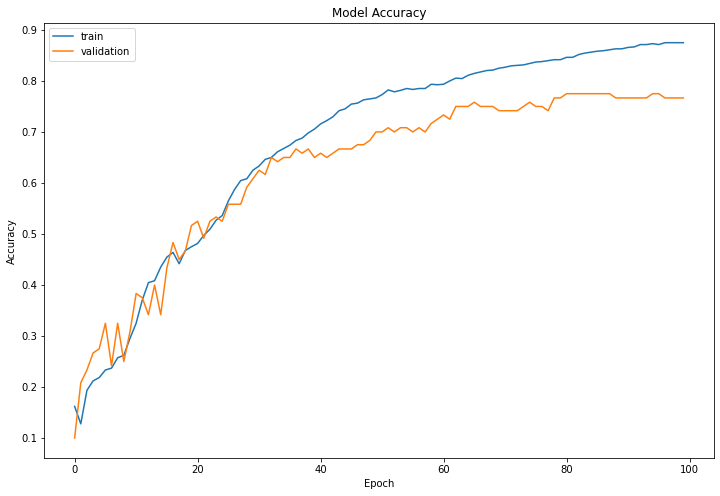

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')